In [2]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
#reading trainig images 
train_data=pd.read_csv('training.csv')
print(train_data)
DATA_DIR='images'
X_train= []
files = train_data['image_name']
files[0]

                                              image_name   x1   x2   y1   y2
0                 JPEG_20160706_121146_1000145715002.png  115  495  143  325
1                 JPEG_20161119_174038_1000690577600.png   23  457   61  409
2      147444927651111470309333776-Roadster-Men-Casua...   37  601   13  470
3                       147772332675720161028_161611.png   27  602  162  385
4                       1473315333651DeeplearnS11638.png   60  586  174  325
5                 JPEG_20161129_143914_1000304878557.png   35  549   37  442
6                 JPEG_20161028_100621_1000815239330.png   77  558   86  434
7                              1475060075141DSC02381.png   50  627   95  320
8                         1473317734429DeeplearnS142.png  104  552   83  428
9                 JPEG_20160607_153530_1000669241198.png  134  500   67  429
10                JPEG_20160627_154106_1000265795536.png   99  524   80  294
11                JPEG_20161129_134328_1000772650224.png   59  587  110  395

'JPEG_20160706_121146_1000145715002.png'

In [5]:
cols = train_data.columns

In [83]:
#preprocessing all images and converting them into numpy array
for file in files:
    img = Image.open(os.path.join(DATA_DIR,file)).convert('RGB').resize([227,227])
    #print(img)
    img_arr = np.array(img)
    #print(img_arr)
    #print(img_arr.shape)
    #fig = plt.figure(figsize = (1,1))
    #ax = fig.add_subplot(1,1,1)
    #ax.imshow(img_arr)
    #plt.show()
    X_train.append((img_arr))
    #X_train[0].shape

14000
[[[141 154 144]
  [141 154 144]
  [140 156 146]
  ...
  [147 159 147]
  [147 159 147]
  [148 158 149]]

 [[140 153 143]
  [141 154 144]
  [143 156 146]
  ...
  [148 160 148]
  [148 160 148]
  [148 158 149]]

 [[142 155 145]
  [142 155 145]
  [142 155 145]
  ...
  [147 159 147]
  [147 159 147]
  [149 159 150]]

 ...

 [[140 156 146]
  [142 158 148]
  [143 156 147]
  ...
  [152 163 155]
  [151 164 155]
  [150 163 154]]

 [[141 157 147]
  [143 159 149]
  [142 158 148]
  ...
  [151 162 154]
  [152 163 155]
  [151 162 154]]

 [[141 157 147]
  [142 158 148]
  [141 157 147]
  ...
  [153 164 156]
  [152 163 155]
  [152 163 155]]]
(227, 227, 3)


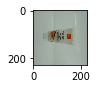

In [84]:
print(len(X_train))
print(X_train[0])
print(X_train[0].shape)
fig = plt.figure(figsize = (1,1))
ax = fig.add_subplot(1,1,1)
ax.imshow(X_train[0])
plt.show()

In [96]:
#saving the preprocessed images 
np.save('object_localization.npy', X_train)

In [65]:
Y_train = train_data[cols[1:]]

In [66]:
#scaling the bounding boxes as per our new size(227*227)
Y_train['x1'] *= (227/640)
Y_train['x2'] *= (227/640)
Y_train['y1'] *= (227/480)
Y_train['y2'] *= (227/480)

C:\Users\jalan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\jalan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jalan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [67]:
#bounding box data frame
Y_train

,x1,x2,y1,y2
0,40.789062,175.570312,67.627083,153.697917
1,8.157813,162.092187,28.847917,193.422917
2,13.123437,213.167187,6.147917,222.270833
3,9.576562,213.521875,76.612500,182.072917
4,21.281250,207.846875,82.287500,153.697917
5,12.414062,194.723437,17.497917,209.029167
6,27.310937,197.915625,40.670833,205.245833
7,17.734375,222.389062,44.927083,151.333333
8,36.887500,195.787500,39.252083,202.408333
9,47.528125,177.343750,31.685417,202.881250


In [68]:
Y_train.iloc[0]

x1     40.789062
x2    175.570312
y1     67.627083
y2    153.697917
Name: 0, dtype: float64

In [73]:
#converting dataframe to numpy array
Y_train= np.array(Y_train)
Y_train[0:100]

array([[ 40.7890625 , 175.5703125 ,  67.62708333, 153.69791667],
       [  8.1578125 , 162.0921875 ,  28.84791667, 193.42291667],
       [ 13.1234375 , 213.1671875 ,   6.14791667, 222.27083333],
       [  9.5765625 , 213.521875  ,  76.6125    , 182.07291667],
       [ 21.28125   , 207.846875  ,  82.2875    , 153.69791667],
       [ 12.4140625 , 194.7234375 ,  17.49791667, 209.02916667],
       [ 27.3109375 , 197.915625  ,  40.67083333, 205.24583333],
       [ 17.734375  , 222.3890625 ,  44.92708333, 151.33333333],
       [ 36.8875    , 195.7875    ,  39.25208333, 202.40833333],
       [ 47.528125  , 177.34375   ,  31.68541667, 202.88125   ],
       [ 35.1140625 , 185.85625   ,  37.83333333, 139.0375    ],
       [ 20.9265625 , 208.2015625 ,  52.02083333, 186.80208333],
       [ 18.44375   , 221.6796875 ,  67.15416667, 143.76666667],
       [ 63.4890625 , 164.9296875 ,  19.38958333, 196.73333333],
       [ 27.3109375 , 170.6046875 ,  37.36041667, 209.975     ],
       [ 30.1484375 , 159

In [71]:
Y_train.shape

(14000, 4)

In [72]:
#saving the y_train array locally
np.save('object_localization_y.npy', Y_train)

In [3]:
test_data = pd.read_csv('test.csv')
DATA_DIR='images'
X_test = []
files = test_data['image_name']
cols = test_data.columns
print(files[0])

1474723840903DSC08089.png


In [4]:
for file in files:
    img = Image.open(os.path.join(DATA_DIR,file)).convert('RGB').resize([227,227])
    #print(img)
    img_arr = np.array(img)
    #print(img_arr)
    #print(img_arr.shape)
    #fig = plt.figure(figsize = (1,1))
    #ax = fig.add_subplot(1,1,1)
    #ax.imshow(img_arr)
    #plt.show()
    X_test.append((img_arr))
    #X_train[0].shape

12815
[[[183 182 188]
  [183 182 188]
  [184 183 189]
  ...
  [173 173 173]
  [171 171 173]
  [189 188 193]]

 [[184 185 190]
  [182 183 188]
  [181 182 187]
  ...
  [175 175 177]
  [175 175 177]
  [196 197 201]]

 [[184 185 190]
  [183 184 189]
  [183 184 189]
  ...
  [168 168 170]
  [170 171 173]
  [194 195 199]]

 ...

 [[200 204 205]
  [199 203 204]
  [200 204 205]
  ...
  [199 203 206]
  [199 203 206]
  [198 202 205]]

 [[200 204 207]
  [199 203 206]
  [200 204 207]
  ...
  [199 203 206]
  [198 202 205]
  [198 202 205]]

 [[200 204 207]
  [200 204 207]
  [200 204 207]
  ...
  [199 203 206]
  [198 202 205]
  [198 202 205]]]
(227, 227, 3)


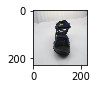

In [5]:
print(len(X_test))
print(X_test[0])
print(X_test[0].shape)
fig = plt.figure(figsize = (1,1))
ax = fig.add_subplot(1,1,1)
ax.imshow(X_test[0])
plt.show()

In [6]:
#saving the test images as numpy array locally
np.save('object_localization_x_test.npy', X_test)